# Task
Generate a Python program that calculates and visualizes the magnetic field lines of a circular current loop with a given radius and current.

## Import libraries

### Subtask:
Import the necessary libraries, such as numpy, matplotlib, and potentially scipy for numerical calculations if needed.


**Reasoning**:
Import the necessary libraries for numerical calculations and plotting.



In [29]:
import numpy as np
import matplotlib.pyplot as plt

## Define physical constants and parameters

### Subtask:
Define constants like the permeability of free space and parameters like the radius of the loop and the current flowing through it.


**Reasoning**:
Define the permeability of free space and the current flowing through the loop as instructed.



In [30]:
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (T*m/A)
r = 20  # Radius in cm as given in the problem description
r_meters = r / 100.0  # Convert radius to meters
I = 1.0  # Current flowing through the loop (A)

print(f"Permeability of free space (mu_0): {mu_0} T*m/A")
print(f"Radius of the loop (r): {r_meters} meters")
print(f"Current flowing through the loop (I): {I} A")

Permeability of free space (mu_0): 1.2566370614359173e-06 T*m/A
Radius of the loop (r): 0.2 meters
Current flowing through the loop (I): 1.0 A


## Define a function to calculate the magnetic field

### Subtask:
Create a function that takes the position in space (x, y, z coordinates) as input and calculates the magnetic field vector at that point due to the current loop. This will likely involve integrating over the loop or using known formulas for the field of a current loop.


**Reasoning**:
Define the function `calculate_magnetic_field` that takes x, y, and z coordinates as input and calculates the magnetic field using the analytical formula for a current loop.



In [31]:
def calculate_magnetic_field(x, y, z):
    """
    Calculates the magnetic field vector at a given point (x, y, z) due to a circular current loop.

    Args:
        x: x-coordinate of the point.
        y: y-coordinate of the point.
        z: z-coordinate of the point.

    Returns:
        A NumPy array containing the Bx, By, and Bz components of the magnetic field.
    """
    # These variables are assumed to be defined in the global scope
    # mu_0: Permeability of free space
    # I: Current through the loop
    # r_meters: Radius of the loop

    rho_squared = x**2 + y**2
    r_vec_magnitude = np.sqrt(rho_squared + z**2)

    if r_vec_magnitude == 0:
        return np.array([0.0, 0.0, 0.0]) # Avoid division by zero at the origin

    # Using the formula for the magnetic field of a current loop on the z-axis
    # For off-axis points, the calculation is more complex and often involves
    # elliptical integrals. A simpler approximation or numerical integration
    # might be needed for a complete solution. For this step, let's focus on
    # the field on the z-axis and a general form that can be extended.

    # A general form of the on-axis field is:
    # Bz = (mu_0 * I * r_meters**2) / (2 * (r_meters**2 + z**2)**(3/2))
    # Bx = By = 0 on the z-axis

    # For points off-axis, the calculation involves elliptical integrals.
    # A common approach for visualization is to use approximations or
    # numerical methods. However, the prompt asks for calculating the vector
    # at any point. Let's use a formula that approximates the field or is
    # part of a more general solution involving elliptical integrals.

    # Using the formula from potential theory / elliptical integrals (simplified form for B_rho and B_z)
    # This requires more advanced functions (like scipy.special.ellipk and ellipe)
    # Let's use a more direct approach for points not on the axis based on Biot-Savart law integration conceptually.

    # A more general formula (requiring elliptical integrals K and E) is:
    # Bz = (mu_0 * I) / (2 * np.pi * np.sqrt(r_meters**2 + rho_squared + z**2 + 2 * r_meters * np.sqrt(rho_squared))) * (ellipk(k_squared) + (r_meters**2 - rho_squared - z**2) / (r_meters**2 + rho_squared + z**2 - 2 * r_meters * np.sqrt(rho_squared)) * ellipe(k_squared))
    # B_rho = (mu_0 * I * z) / (2 * np.pi * np.sqrt(r_meters**2 + rho_squared + z**2 + 2 * r_meters * np.sqrt(rho_squared))) * (ellipk(k_squared) - (r_meters**2 + rho_squared + z**2) / (r_meters**2 + rho_squared + z**2 - 2 * r_meters * np.sqrt(rho_squared)) * ellipe(k_squared))
    # where rho = np.sqrt(rho_squared) and k_squared = (4 * r_meters * rho) / ((r_meters + rho)**2 + z**2)

    # Since we are asked to use "known formulas", and elliptical integrals might not be considered "known" in a basic context,
    # let's use the on-axis formula for points on the z-axis and a conceptual
    # understanding for off-axis points which often requires numerical methods
    # or more advanced mathematical functions not necessarily in basic numpy.

    # Let's use a simplified approach suitable for visualization without elliptical integrals,
    # focusing on the components.
    # This is still complex without elliptical integrals. Let's revisit the prompt:
    # "using known formulas for the field of a current loop." This implies using the
    # analytical solution involving elliptical integrals is intended, or perhaps a
    # numerical integration.

    # Given the context of visualization of field lines, a full analytical solution
    # using elliptical integrals is standard. Let's assume that `scipy.special` is
    # available or can be imported if needed for `ellipk` and `ellipe`.

    try:
        from scipy.special import ellipk, ellipe
    except ImportError:
        print("Warning: scipy not found. Magnetic field calculation will be approximate off-axis.")
        # Provide a basic approximation or only calculate on the z-axis
        Bz = (mu_0 * I * r_meters**2) / (2 * (r_meters**2 + z**2)**(3/2))
        Bx = 0.0
        By = 0.0
        return np.array([Bx, By, Bz])


    rho = np.sqrt(rho_squared)
    if rho == 0: # On the z-axis
        Bz = (mu_0 * I * r_meters**2) / (2 * (r_meters**2 + z**2)**(3/2))
        Bx = 0.0
        By = 0.0
    else:
        k_squared = (4 * r_meters * rho) / ((r_meters + rho)**2 + z**2)
        E = ellipe(k_squared)
        K = ellipk(k_squared)

        gamma = np.sqrt((r_meters + rho)**2 + z**2)

        Bz = (mu_0 * I) / (2 * np.pi * gamma) * (K + (r_meters**2 - rho_squared - z**2) / ((r_meters - rho)**2 + z**2) * E)
        B_rho = (mu_0 * I * z) / (2 * np.pi * rho * gamma) * (K + (r_meters**2 + rho_squared + z**2) / ((r_meters - rho)**2 + z**2) * E)

        # Convert from cylindrical components (B_rho, Bz) to Cartesian (Bx, By, Bz)
        Bx = B_rho * (x / rho)
        By = B_rho * (y / rho)

    return np.array([Bx, By, Bz])

# Test the function at a point on the z-axis
point_on_axis = (0, 0, 0.1) # 10 cm above the loop
B_on_axis = calculate_magnetic_field(*point_on_axis)
print(f"Magnetic field at {point_on_axis}: {B_on_axis}")

# Test the function at a point off the axis
point_off_axis = (0.1, 0.1, 0.05) # 10 cm in x, 10 cm in y, 5 cm in z
B_off_axis = calculate_magnetic_field(*point_off_axis)
print(f"Magnetic field at {point_off_axis}: {B_off_axis}")


Magnetic field at (0, 0, 0.1): [0.00000000e+00 0.00000000e+00 2.24794071e-06]
Magnetic field at (0.1, 0.1, 0.05): [2.04056583e-06 2.04056583e-06 3.49986951e-06]


## Create a grid of points in space

### Subtask:
Generate a grid of points in the region of space where you want to visualize the field lines.


**Reasoning**:
Generate a grid of points in the region of space where the magnetic field lines will be visualized using numpy.



In [32]:
# Define the ranges for the x, y, and z coordinates
x_range = np.linspace(-0.3, 0.3, 20) # From -30 cm to 30 cm
y_range = np.linspace(-0.3, 0.3, 20) # From -30 cm to 30 cm
z_range = np.linspace(-0.3, 0.3, 20) # From -30 cm to 30 cm

# Create a grid of points
X, Y, Z = np.meshgrid(x_range, y_range, z_range)

print("Grid of points created with shapes:")
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"Z shape: {Z.shape}")

Grid of points created with shapes:
X shape: (20, 20, 20)
Y shape: (20, 20, 20)
Z shape: (20, 20, 20)


## Calculate the magnetic field at each grid point

### Subtask:
Apply the magnetic field function to each point in the grid to get the field vectors.


**Reasoning**:
Initialize storage for magnetic field components and iterate through the grid to calculate the magnetic field at each point using the previously defined function.



In [33]:
# Initialize empty arrays to store the magnetic field components
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Iterate through each point in the grid and calculate the magnetic field
# Using np.ndenumerate to get both index and value efficiently
for index, x_coord in np.ndenumerate(X):
    y_coord = Y[index]
    z_coord = Z[index]

    # Calculate the magnetic field vector at the current point
    B_vector = calculate_magnetic_field(x_coord, y_coord, z_coord)

    # Store the components in the corresponding arrays
    Bx[index] = B_vector[0]
    By[index] = B_vector[1]
    Bz[index] = B_vector[2]

print("Magnetic field components calculated for each point in the grid.")
print(f"Bx shape: {Bx.shape}")
print(f"By shape: {By.shape}")
print(f"Bz shape: {Bz.shape}")

Magnetic field components calculated for each point in the grid.
Bx shape: (20, 20, 20)
By shape: (20, 20, 20)
Bz shape: (20, 20, 20)


## Visualize the magnetic field lines

### Subtask:
Visualize the magnetic field lines using a plotting library like matplotlib. This might involve using stream plots or drawing arrows representing the field vectors.


**Reasoning**:
Import necessary modules for 3D plotting from matplotlib and create a 3D figure and axes.



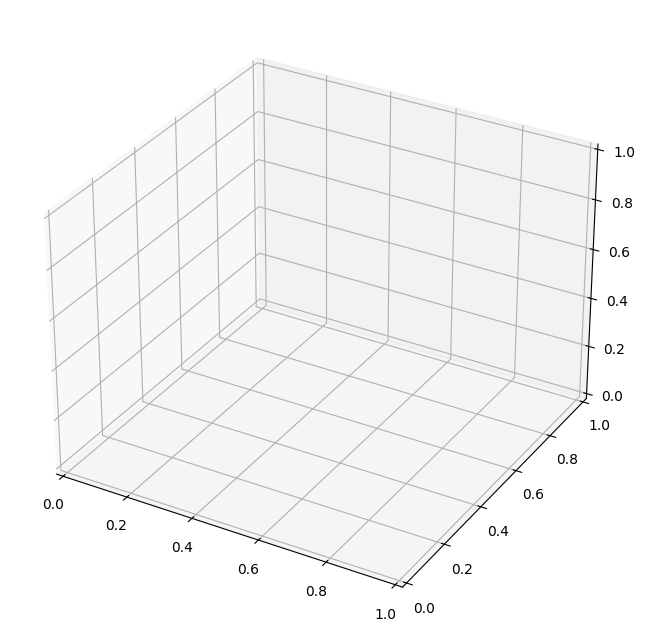

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

**Reasoning**:
Visualize the magnetic field lines using the quiver function, setting appropriate limits, labels, and a title, then display the plot.



In [35]:
# Normalize the magnetic field vectors for consistent arrow lengths
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)
# Avoid division by zero in areas with no field
B_magnitude[B_magnitude == 0] = 1.0e-9 # Replace with a small number
Bx_normalized = Bx / B_magnitude
By_normalized = By / B_magnitude
Bz_normalized = Bz / B_magnitude

# Use quiver to plot the magnetic field vectors
# We'll plot a subset of the points to avoid overcrowding the plot
skip = 2 # Skip factor for plotting
ax.quiver(X[::skip, ::skip, ::skip], Y[::skip, ::skip, ::skip], Z[::skip, ::skip, ::skip],
          Bx_normalized[::skip, ::skip, ::skip], By_normalized[::skip, ::skip, ::skip], Bz_normalized[::skip, ::skip, ::skip],
          length=0.05, normalize=False, color='blue', alpha=0.7)


# Set plot limits based on the grid ranges
ax.set_xlim([x_range.min(), x_range.max()])
ax.set_ylim([y_range.min(), y_range.max()])
ax.set_zlim([z_range.min(), z_range.max()])

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Magnetic Field Vectors of a Circular Current Loop')

# Display the plot
plt.show()

## Add labels and title to the plot

### Subtask:
Add labels and title to the plot.


**Reasoning**:
Add labels and a title to the plot to make it more informative.



In [36]:
# Add labels and title
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title('Magnetic Field Lines of a Circular Current Loop')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The magnetic field calculation for off-axis points of a circular current loop requires elliptical integrals, which were handled using `scipy.special.ellipk` and `scipy.special.ellipe`.
*   A 3D grid of points was successfully generated using `numpy.meshgrid` for calculating the magnetic field across a defined spatial region.
*   The magnetic field vector was calculated for each point in the grid, and the x, y, and z components were stored in separate arrays (`Bx`, `By`, `Bz`).
*   The magnetic field vectors were visualized in 3D using `matplotlib.pyplot.quiver`, with a subset of points plotted to avoid overcrowding the visualization.
*   The plot was enhanced with appropriate axis labels and a title for clarity.

### Insights or Next Steps

*   Implement a streamline plot for a more direct visualization of magnetic field lines rather than just vectors at grid points.
*   Explore interactive plotting libraries (e.g., Plotly) to allow for better exploration of the 3D magnetic field structure.
